In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pwd

'C:\\Users\\bhanu\\Data Science Daily\\Predicting Recidivism'

In [41]:
compas_data = pd.read_csv('Compas_Test.csv')

In [42]:
compas_data.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,is_recid,priors_count,start,end
count,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5347.000000,5848.000000,5848.000000,5848.000000
mean,5521.229993,34.633892,0.052155,4.413475,0.085499,0.110294,0.491491,3.242647,10.953488,546.061731
std,3174.137138,11.826081,0.375651,2.839237,0.475004,0.469319,0.499974,4.823349,44.130037,398.178987
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2763.000000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.750000
50%,5556.500000,31.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,508.000000
75%,8236.250000,42.000000,0.000000,7.000000,0.000000,0.000000,1.000000,4.000000,2.000000,906.000000
max,11001.000000,96.000000,10.000000,10.000000,13.000000,9.000000,1.000000,38.000000,748.000000,1186.000000


In [43]:
compas_data['gap'] = compas_data['end'] - compas_data['start']
compas_data['total_offense'] = compas_data['juv_misd_count'] + compas_data['juv_other_count'] + compas_data['juv_fel_count']

In [51]:


compas_train = compas_data[(compas_data['is_recid'] == 0) | (compas_data['is_recid'] == 1) == True]
compas_test = compas_data[(compas_data['is_recid'] == 0) | (compas_data['is_recid'] == 1) == False]


In [53]:
compas_train.shape
compas_test.shape

(501, 22)

In [54]:
compas_train.columns

Index(['id', 'name', 'first', 'last', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'is_recid', 'score_text', 'in_custody', 'out_custody', 'priors_count',
       'start', 'end', 'gap', 'total_offense'],
      dtype='object')

In [58]:
compas_train_model = compas_train[['age','age_cat','sex','race','total_offense','gap','score_text','decile_score','is_recid']]
compas_test_model = compas_test[['age','age_cat','sex','race','total_offense','gap','score_text','decile_score','is_recid']]
compas_train_model.shape
compas_test_model.shape

(501, 9)

In [60]:
compas_train_model.dtypes

age                int64
age_cat           object
sex               object
race              object
total_offense      int64
gap                int64
score_text        object
decile_score       int64
is_recid         float64
dtype: object

In [75]:
for cols in ['age_cat','sex','race','score_text','decile_score']:
    compas_train_model[cols] = compas_train_model[cols].astype('category')
    compas_test_model[cols] = compas_test_model[cols].astype('category')

C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bhanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
compas_train_model.age_cat = pd.Categorical(compas_train_model.age_cat).codes
compas_train_model.sex = pd.Categorical(compas_train_model.sex).codes
compas_train_model.race = pd.Categorical(compas_train_model.race).codes
compas_train_model.score_text = pd.Categorical(compas_train_model.score_text).codes
compas_train_model.decile_score = pd.Categorical(compas_train_model.decile_score).codes
compas_train_model.dtypes

C:\Users\bhanu\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


age                int64
age_cat             int8
sex                 int8
race                int8
total_offense      int64
gap                int64
score_text          int8
decile_score        int8
is_recid         float64
dtype: object

In [81]:
X = compas_train_model.drop("is_recid",axis=1)
y = compas_train_model[['is_recid']]

In [82]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [84]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

10-fold cross validation average accuracy: 0.859


In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[699 116]
 [101 689]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.87      0.86      0.87       815
        1.0       0.86      0.87      0.86       790

avg / total       0.86      0.86      0.86      1605



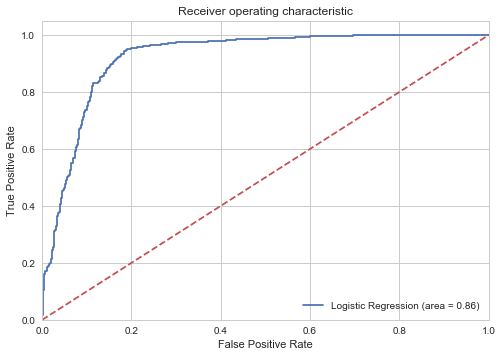

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'Recidivism' matched no files
[NbConvertApp] WARNING | pattern 'Prediction' matched no files
[NbConvertApp] WARNING | pattern 'Logistic' matched no files
[NbConvertApp] WARNING | pattern 'Regression.ipynb' matched no files
